# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Importing Data

In [3]:
# Project folder

path = r'C:\Users\peter\Documents\Berlin AirBnB'

In [4]:
path

'C:\\Users\\peter\\Documents\\Berlin AirBnB'

In [5]:
# Importing cleaned dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Berlin AirBnB_clean_2.csv'))

# 03. Data Cleaning

In [6]:
df.head()

,Unnamed: 0,id,host_id,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm,price_category
0,0,4.021868e+07,39450649,Pankow,Buch,52.63136,13.51879,Entire home/apt,51,1,11,0.40,21,345,8,middle_price
1,1,3.784921e+07,286623313,Tempelhof - Schöneberg,Lichtenrade,52.37272,13.41607,Entire home/apt,40,28,2,0.07,1,352,0,middle_price
2,2,4.021881e+07,39450649,Pankow,Buch,52.63136,13.51879,Entire home/apt,87,1,3,0.16,21,304,2,high_price
3,3,3.243150e+07,243598169,Spandau,Falkenhagener Feld,52.55720,13.14205,Entire home/apt,55,3,16,0.43,1,215,5,middle_price
4,4,5.468740e+17,156670608,Spandau,Gatow / Kladow,52.45472,13.10890,Entire home/apt,90,3,4,2.55,1,251,4,high_price


In [7]:
df.shape

(16265, 16)

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0             0
id                     0
host_id                0
neighborhood_group     0
neighborhood           0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
host_listings_count    0
availability_365       0
num_reviews_ltm        0
price_category         0
dtype: int64

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No duplicates

(16265,)

C:\Users\peter\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

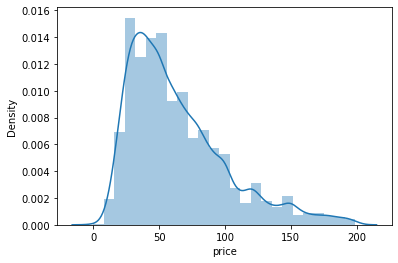

In [11]:
# Checking for extreme outliers

sns.distplot(df['price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df.price.describe()

count    16265.000000
mean        63.791884
std         37.161708
min          0.000000
25%         35.000000
50%         55.000000
75%         81.000000
max        199.000000
Name: price, dtype: float64

In [13]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm
count,16265.000000,1.626500e+04,1.626500e+04,16265.000000,16265.000000,16265.000000,16265.000000,16265.000000,16265.000000,16265.000000,16265.000000,16265.000000
mean,8427.764095,8.955071e+15,9.650916e+07,52.509771,13.405504,63.791884,11.000799,24.135321,0.560322,2.738211,73.209407,4.317123
std,4894.946303,7.043476e+16,1.136410e+08,0.033542,0.065368,37.161708,36.790896,55.543774,1.433575,5.775696,114.173828,16.626441
min,0.000000,3.176000e+03,1.581000e+03,52.340070,13.082930,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4173.000000,1.206018e+07,1.238553e+07,52.489360,13.368170,35.000000,2.000000,1.000000,0.030000,1.000000,0.000000,0.000000
50%,8376.000000,2.370228e+07,4.377035e+07,52.509500,13.415327,55.000000,3.000000,5.000000,0.140000,1.000000,0.000000,0.000000
75%,12664.000000,4.007558e+07,1.472609e+08,52.533170,13.439650,81.000000,5.000000,19.000000,0.570000,2.000000,122.000000,3.000000
max,16961.000000,5.855340e+17,4.500200e+08,52.656110,13.757360,199.000000,1124.000000,1096.000000,91.850000,50.000000,365.000000,992.000000


C:\Users\peter\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='availability_365', ylabel='Density'>

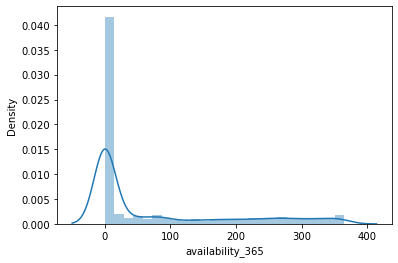

In [14]:
# Checking for extreme outliers

sns.distplot(df['availability_365'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [15]:
df.availability_365.describe()

count    16265.000000
mean        73.209407
std        114.173828
min          0.000000
25%          0.000000
50%          0.000000
75%        122.000000
max        365.000000
Name: availability_365, dtype: float64

In [16]:
df.reviews_per_month.describe()

count    16265.000000
mean         0.560322
std          1.433575
min          0.000000
25%          0.030000
50%          0.140000
75%          0.570000
max         91.850000
Name: reviews_per_month, dtype: float64

In [17]:
df.host_listings_count.describe()

count    16265.000000
mean         2.738211
std          5.775696
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: host_listings_count, dtype: float64

In [18]:
## No significant issues found in the test variables: price, availability_365, reviews_per_month, or host_listings_count

##Obviously there are for each variable several significant outliers, but this is largely explained due to some rentals
## being hotels (i.e. why there are so many reviews per month at some locations, as well as available all year round, etc.)

# 04. Data Prep for Regression Analysis

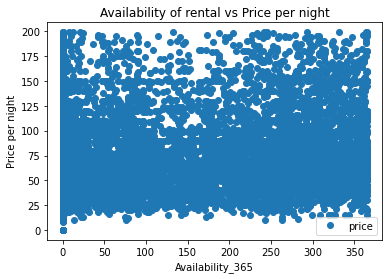

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'availability_365', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Availability of rental vs Price per night')  
plt.xlabel('Availability_365')  
plt.ylabel('Price per night')  
plt.show()

Unfortunately, the above scatterplot shows that the price per night and the availability of a room is more or less the same, but this was to be expected considering we're observing a large city where there are thousands of listed apts/houses/rooms/hotels

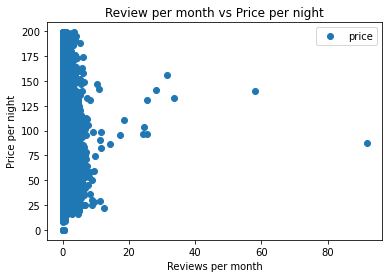

In [20]:
## Considering another variable based on the level of correlation with the 'price' variable based on previous exericse. 

# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'reviews_per_month', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Review per month vs Price per night')  
plt.xlabel('Reviews per month')  
plt.ylabel('Price per night')  
plt.show()

The above graph is potentially problematic because it is comparing the number of reviews per month vs. price per night. While one could adjust the variables to "price per month" or "reviews per day/night," I believe this would effect the data too strongly. 

Nonetheless, based on the data, it is clear that regardless of the price per night of an accomidation, most locations have between 1 to 10 reviews per month with a few outliers. We can observe that one accomidation lies somewhere between the 75-100 EUR per night range and has around 94 reviews per month. This is likely a hotel that is listed on the airBnB platform and not necessarily a rented out apartment/room as with most AirBnB's hosts (or potentially a lot of fake reviews; equally possible these days!). 

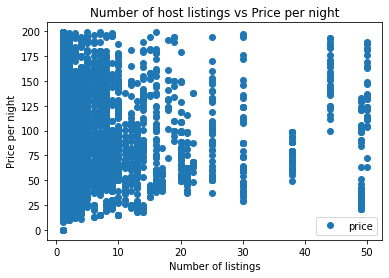

In [21]:
## The last variable we shall test will be price vs. host_listings_count

# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'host_listings_count', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of host listings vs Price per night')  
plt.xlabel('Number of listings')  
plt.ylabel('Price per night')  
plt.show()

The graph details a broad range of results. For instance, many host listings who have less than 20 listed apartments/rentals, have price ranges that vary greatly from close to 0 to up to 200 per night. However, the number of host listings between 30 and 50 vary greatly. We can observe that the price per night for the number of host listings around 38 range in an average price category of 35-100 per night, whereas the number of host listings around 45 are mostly higher end stays from between 100 to 200 per night. Lastly, for hosts with close to 50 listings, the price range expands throughout the entire dataset.  

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['host_listings_count'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [23]:
X

array([[21],
       [ 1],
       [21],
       ...,
       [21],
       [ 8],
       [21]], dtype=int64)

In [24]:
y

array([[ 51],
       [ 40],
       [ 87],
       ...,
       [ 38],
       [116],
       [ 45]], dtype=int64)

In [25]:
# Spliting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Hypothesis: If an increase in host_listing_counts, the lower the price per night will be.

The above hypothesis is based upon when a host lists many different locations, it is likely either someone renting out a hostel, hotel, or large apartment complex for short to medium length stays.

# 05. Regression Analysis

In [26]:
## Running a regressiong analysis for Hypothesis 1.

In [27]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

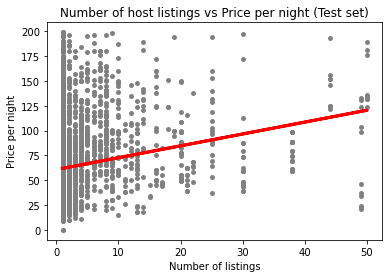

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of host listings vs Price per night (Test set)')
plot_test.xlabel('Number of listings')
plot_test.ylabel('Price per night')
plot_test.show()

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.19449277]]
Mean squared error:  1272.8718662965848
R2 score:  0.04250090387999661


In [33]:
y_predicted

array([[61.95235257],
       [65.53583086],
       [61.95235257],
       ...,
       [61.95235257],
       [61.95235257],
       [61.95235257]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,44,61.952353
1,92,65.535831
2,85,61.952353
3,45,61.952353
4,35,61.952353
5,142,77.480759
6,30,61.952353
7,100,71.508295
8,82,63.146845
9,30,61.952353


In [35]:
##### Comparing how the regression fits the training set

In [36]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.19449277]]
Mean squared error:  1355.4969814741846
R2 score:  0.03376699951815876


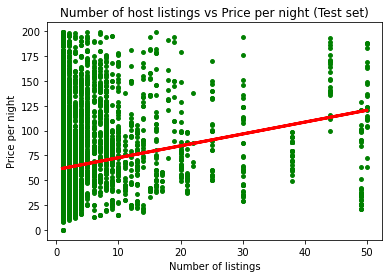

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of host listings vs Price per night (Test set)')
plot_test.xlabel('Number of listings')
plot_test.ylabel('Price per night')
plot_test.show()

# 06. Results

When looking at the training and test sets, we see some similarities. However, overall, we can observe that the regression analysis indicates that there is not a good fit and a low level of correlation between the variables. 

The slope is in both cases showing a positive relationship as it is 1.19 in both cases, indicating that as the number of host_listings_count increases, so does the price in rentals, which would defeat our hypothesis. However, there is significant mean squared errors of 1272.87 and 1355.49 in the test and training regressions respectively. Moreover, the actual and predicted values vary greatly in size. As such, this high level of MSE means that the regression line is not very close to the observations, and therefore is clearly not a good fit. Lastly, to further indicate that the regression is not a good fit, we have very low R-squared values of 0.04 and 0.03 respectively, which only highlights that these variables likely do not truly impact one another of have any effect on each other in any way. Rather, it is likely that the price per night of a stay is influenced by other factors such as room_type and/or neighborhood_group (which we could clearly observe more closely in the geospatial analysis in 6.3). 

### Testing regressions using Dummy variables

In [40]:
# Importing cleaned dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Berlin AirBnB_clean_2.csv'))

In [41]:
df.head()

,Unnamed: 0,id,host_id,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm,price_category
0,0,4.021868e+07,39450649,Pankow,Buch,52.63136,13.51879,Entire home/apt,51,1,11,0.40,21,345,8,middle_price
1,1,3.784921e+07,286623313,Tempelhof - Schöneberg,Lichtenrade,52.37272,13.41607,Entire home/apt,40,28,2,0.07,1,352,0,middle_price
2,2,4.021881e+07,39450649,Pankow,Buch,52.63136,13.51879,Entire home/apt,87,1,3,0.16,21,304,2,high_price
3,3,3.243150e+07,243598169,Spandau,Falkenhagener Feld,52.55720,13.14205,Entire home/apt,55,3,16,0.43,1,215,5,middle_price
4,4,5.468740e+17,156670608,Spandau,Gatow / Kladow,52.45472,13.10890,Entire home/apt,90,3,4,2.55,1,251,4,high_price


In [42]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

### Creating violin and boxplots to highlight density of prices for neighborhoods as well as showing the quartiles and also outliers for each neighborhood.

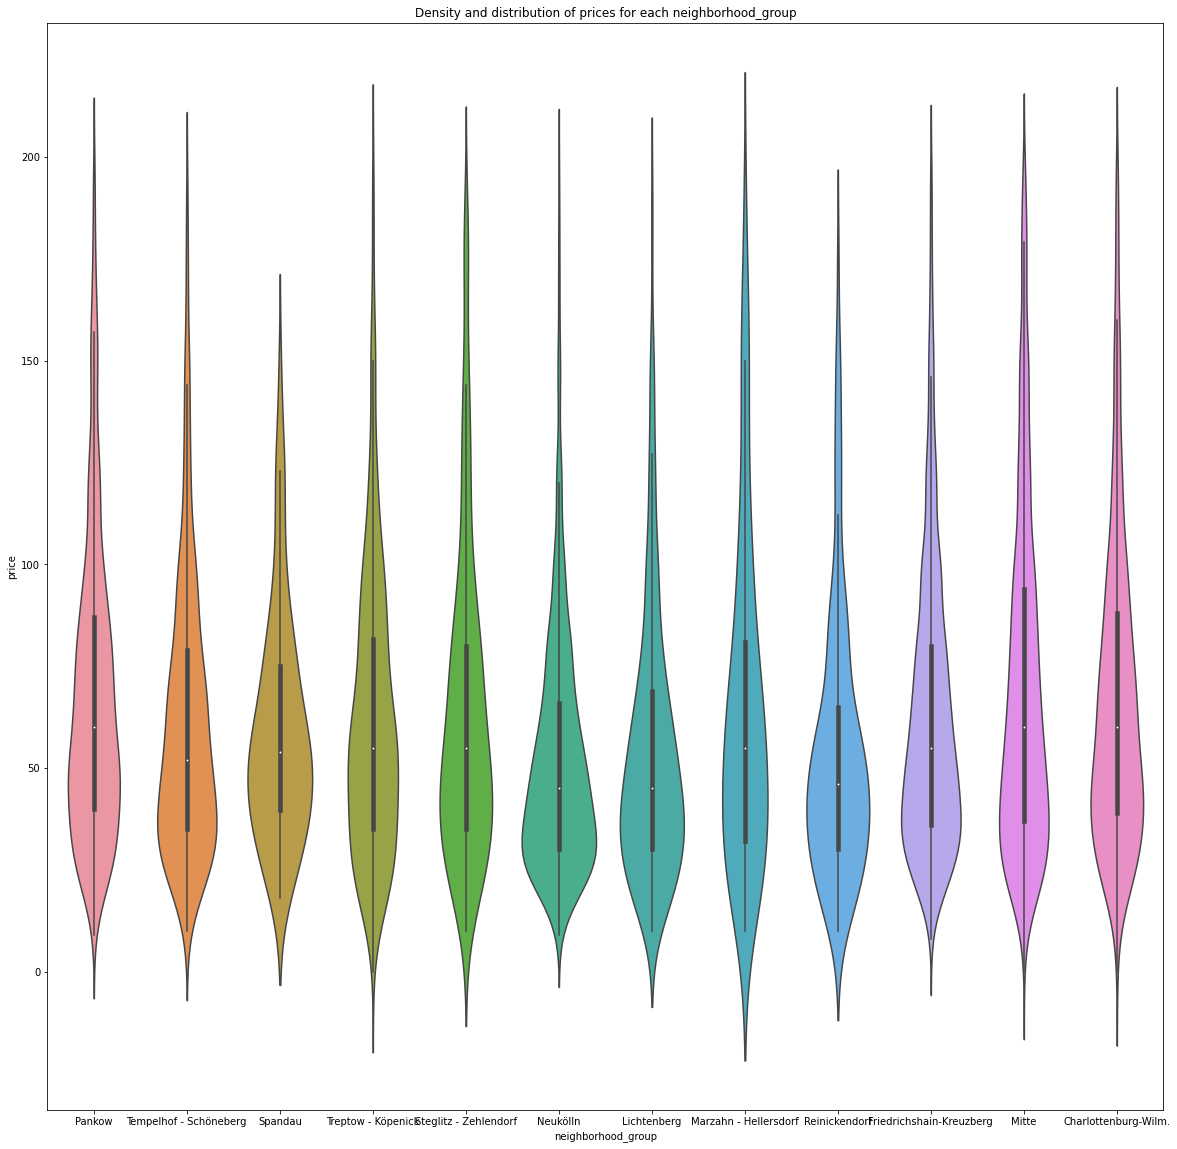

In [45]:
sub=df
#using violinplot to showcase density and distribtuion of prices 
viz=sns.violinplot(data=sub, x='neighborhood_group', y='price')
viz.set_title('Density and distribution of prices for each neighborhood_group')


plt.rcParams["figure.figsize"] = (20,20)

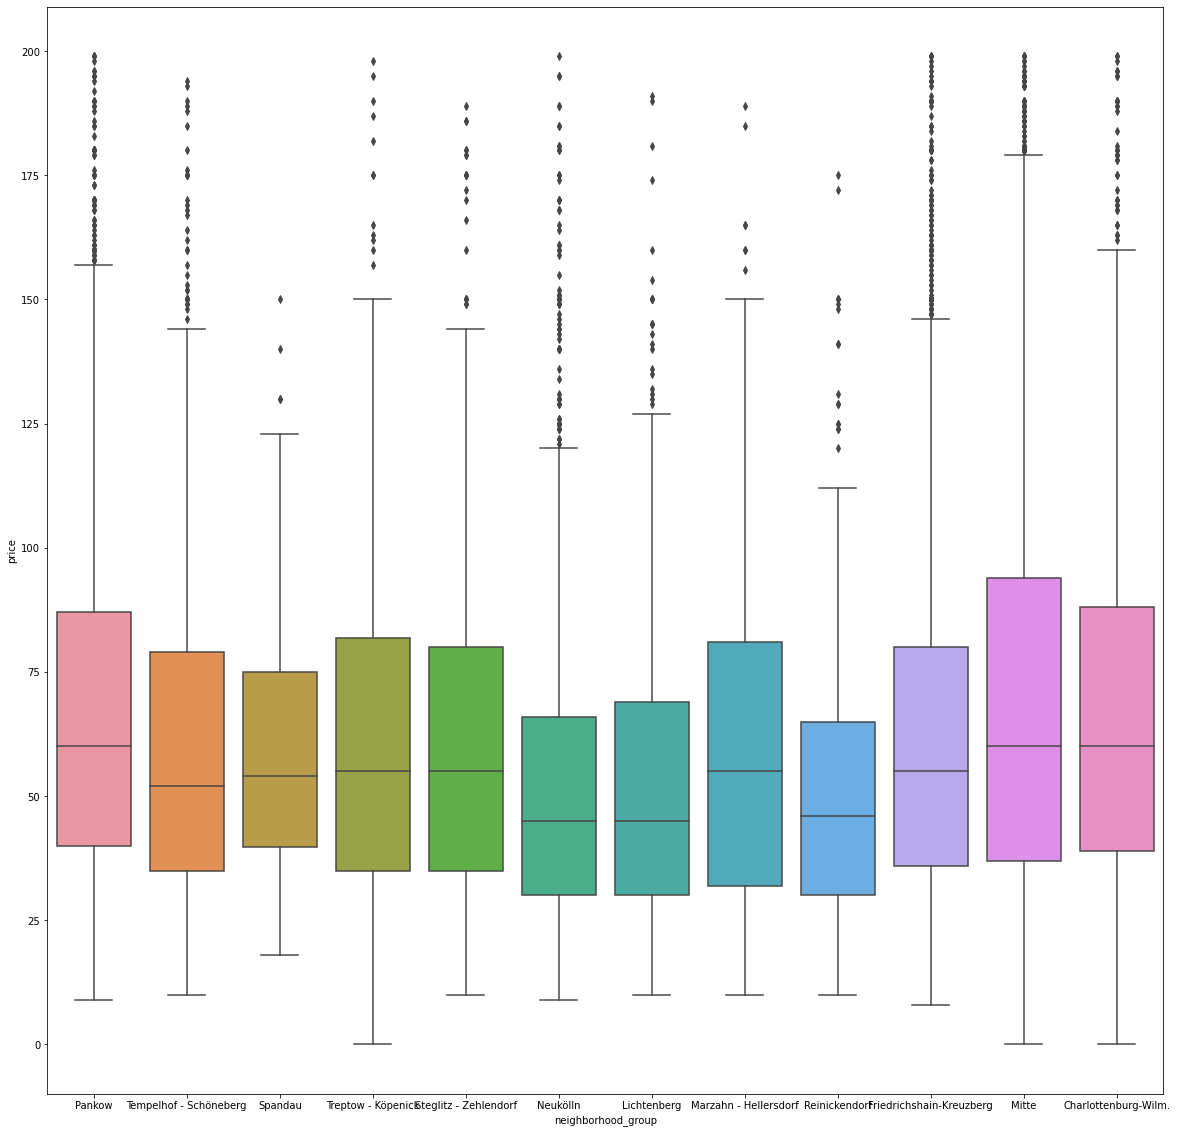

In [49]:
sns.boxplot(y='price',x='neighborhood_group',data=df)

plt.rcParams["figure.figsize"] = (20,20)

Generally, the most expensive neighborhoods seem to be Pankow, Mitte, and Charlottenburg-Wilmersdorf. Neukoelln and Reinickendorf tend to have a higher percentage of more affordable housing, i.e. lower prices on average stays via AirBnB. 

## Creating dummy variable for neighborhood_group and testing regressions

In [50]:
X = df['neighborhood_group']

In [51]:
X = pd.get_dummies (data = X, drop_first = True)
X.head()

,Friedrichshain-Kreuzberg,Lichtenberg,Marzahn - Hellersdorf,Mitte,Neukölln,Pankow,Reinickendorf,Spandau,Steglitz - Zehlendorf,Tempelhof - Schöneberg,Treptow - Köpenick
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [52]:
Y = df['price']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9759, 11)
(6506, 11)
(9759,)
(6506,)


In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [55]:
# print the intercept
print(model.intercept_)

65.70976253298149


In [56]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Friedrichshain-Kreuzberg,-2.478426
Lichtenberg,-12.514179
Marzahn - Hellersdorf,-1.811212
Mitte,3.981208
Neukölln,-12.989821
Pankow,2.628348
Reinickendorf,-14.794270
Spandau,-6.578184
Steglitz - Zehlendorf,0.377374
Tempelhof - Schöneberg,-4.972593


In [57]:
predictions = model.predict(X_test)
predictions

array([65.70976253, 63.23133641, 52.71994135, ..., 68.33811075,
       52.71994135, 52.71994135])

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

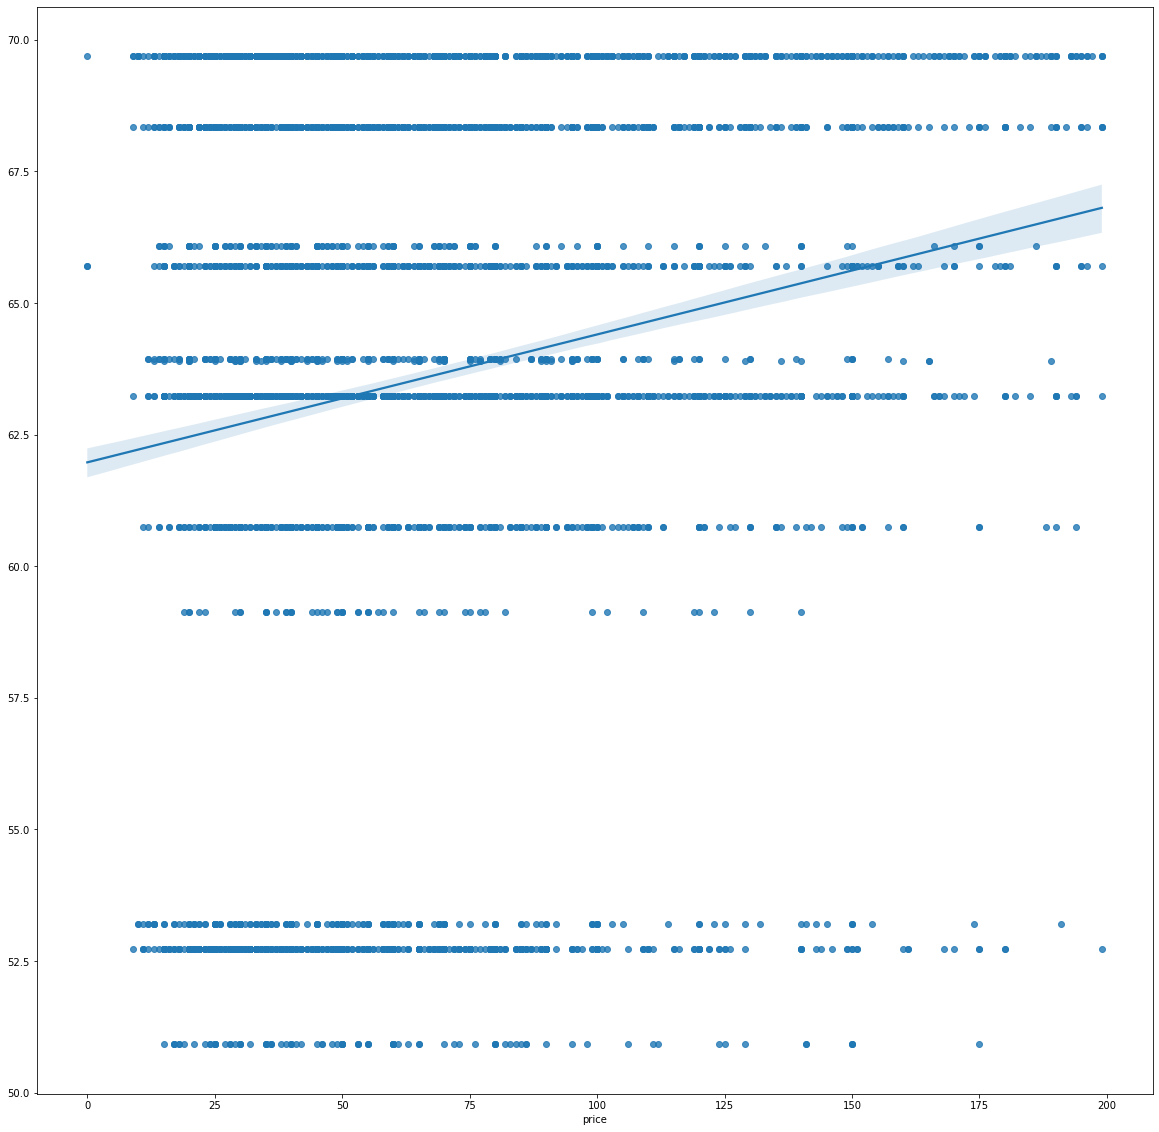

In [58]:
sns.regplot(y_test,predictions)

In [59]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     23.67
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           9.12e-49
Time:                        17:30:41   Log-Likelihood:                -48876.
No. Observations:                9759   AIC:                         9.778e+04
Df Residuals:                    9747   BIC:                         9.786e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\peter\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Based on also the creation of a dummy variable, it appears that there is no clear impact on price fegardless of where one is staying. The dataframe is all over the place in terms of standard error and any level of correlation. As such, price is solely determined on the location of where one is staying, albeit the boxplot and violin graph show some indication that there are at least certain areas which are generally more expensive. 